# Chapter 4.1:  Classifying movie reviews

A binary classification example

> You’ll work with the IMDB dataset: a set of 50,000 highly polarized reviews from the Internet Movie Database. They’re split into 25,000 reviews for training and 25,000 reviews for testing, each set consisting of 50% negative and 50% positive reviews.

> Just like the MNIST dataset, the IMDB dataset comes packaged with Keras. It has already been preprocessed: the reviews (sequences of words) have been turned into sequences of integers, where each integer stands for a specific word in a dictionary. This enables us to focus on model building, training, and evaluation.

In [1]:
import tensorflow as tf
import numpy as np 

The following code will load the dataset (when you run it the first time, about 80 MB of data will be downloaded to your machine).

In [2]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.8/site-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.8/site-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do t

The argument `num_words=10000` means you’ll only keep the top 10,000 most frequently occurring words in the training data. Rare words will be discarded. This allows you to work with vector data of manageable size. If we didn’t set this limit, we’d be working with 88,585 unique words in the training data, which is unnecessarily large. Many of these words only occur in a single sample, and thus can’t be meaningfully used for classification.

The variables `train_data` and `test_data` are lists of reviews; each review is a list of word indices (encoding a sequence of words). `train_labels` and `test_labels` are lists of 0s and 1s, where 0 stands for negative and 1 stands for positive:

For kicks, here’s how you can quickly decode one of these reviews back to English words:

In [3]:
word_index = imdb.get_word_index()                               

reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])       

decoded_review = ' '.join(
    [reverse_word_index.get(i - 3, '?') for i in train_data[1]]) 

print(decoded_review)
print(f"Label: {train_labels[1]}")

? big hair big boobs bad music and a giant safety pin these are the words to best describe this terrible movie i love cheesy horror movies and i've seen hundreds but this had got to be on of the worst ever made the plot is paper thin and ridiculous the acting is an abomination the script is completely laughable the best is the end showdown with the cop and how he worked out who the killer is it's just so damn terribly written the clothes are sickening and funny in equal ? the hair is big lots of boobs ? men wear those cut ? shirts that show off their ? sickening that men actually wore them and the music is just ? trash that plays over and over again in almost every scene there is trashy music boobs and ? taking away bodies and the gym still doesn't close for ? all joking aside this is a truly bad film whose only charm is to look back on the disaster that was the 80's and have a good old laugh at how bad everything was back then
Label: 0


You can’t directly feed lists of integers into a neural network. They have all different lengths, but a neural network expects to process contiguous batches of data. You have to turn your lists into tensors. This will be done using one-hot encoding.

One-hot encode your lists to turn them into vectors of 0s and 1s. This would mean, for instance, turning the sequence [8, 5] into a 10,000-dimensional vector that would be all 0s except for indices 8 and 5, which would be 1s. Then you could use as the first layer in your model a Dense layer, capable of handling floating-point vector data.

In [4]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))           

    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.                             

    return results

# Vectorize samples
x_train = vectorize_sequences(train_data)                     
x_test = vectorize_sequences(test_data)       

# Vectorize labels
# Is this even necessary?
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

Earlier, I saw a user mention that the dataset mapping does not use "0". If we add up all of the one-hot encodings, we see that this is the case. 

In [5]:
count = np.zeros(10000)
for review in x_train:
    count = np.add(count, review)

count

array([    0., 25000., 24325., ...,    27.,    31.,    31.])

## Build the model

Use a sequential model with two densely connected layers of 16 units each, and then a single unit layer at the end that will represent a probabilty.

In [6]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
  layers.Dense(16, activation='relu'),
  layers.Dense(16, activation='relu'),
  layers.Dense(1, activation='sigmoid')
])

## Compile the model

In [7]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

## Set aside a validation set

In [8]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

## Train the model

In [9]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 62ms/step - loss: 0.5852 - accuracy: 0.7153 - val_loss: 0.3919 - val_accuracy: 0.8664
Epoch 2/20
30/30 [==============================] - 1s 17ms/step - loss: 0.3245 - accuracy: 0.9010 - val_loss: 0.3104 - val_accuracy: 0.8834
Epoch 3/20
30/30 [==============================] - 1s 18ms/step - loss: 0.2289 - accuracy: 0.9307 - val_loss: 0.2797 - val_accuracy: 0.8907
Epoch 4/20
30/30 [==============================] - 1s 17ms/step - loss: 0.1755 - accuracy: 0.9478 - val_loss: 0.2856 - val_accuracy: 0.8849
Epoch 5/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1480 - accuracy: 0.9535 - val_loss: 0.2793 - val_accuracy: 0.8890
Epoch 6/20
30/30 [==============================] - 1s 17ms/step - loss: 0.1130 - accuracy: 0.9687 - val_loss: 0.3074 - val_accuracy: 0.8784
Epoch 7/20
30/30 [==============================] - 1s 17ms/step - loss: 0.0987 - accuracy: 0.9727 - val_loss: 0.3122 - val_accuracy: 0.8842
Epoch 8/20
30

## Plot the training and validation loss

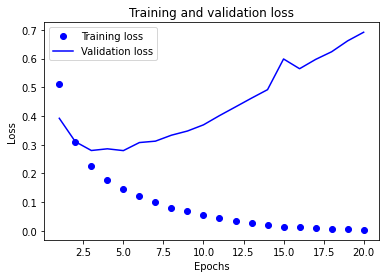

In [10]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')          

plt.plot(epochs, val_loss_values, 'b', label='Validation loss')     

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

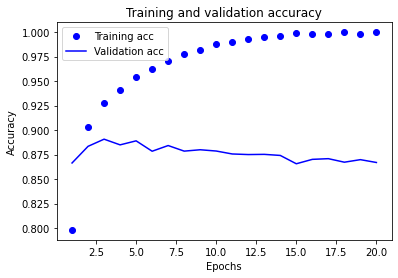

In [11]:
plt.clf()                                                           

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Retrain the model using less epochs

In [12]:
model = keras.Sequential([
    layers.Dense(16, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 11ms/step - loss: 0.5501 - accuracy: 0.7454
Epoch 2/4
49/49 [==============================] - 1s 10ms/step - loss: 0.2709 - accuracy: 0.9134
Epoch 3/4
49/49 [==============================] - 1s 11ms/step - loss: 0.2053 - accuracy: 0.9280
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.2909 - accuracy: 0.8836


In [13]:
print(model.metrics_names)
print(results)

results_dict = {"base_accuracy": results[1]}

['loss', 'accuracy']
[0.29090356826782227, 0.8835600018501282]


## Further experiments

The following experiments will help convince you that the architecture choices you’ve made are all fairly reasonable, although there’s still room for improvement:

- You used two representation layers before the final classification layer. Try using one or three representation layers, and see how doing so affects validation and test accuracy.
- Try using layers with more units or fewer units: 32 units, 64 units, and so on.
- Try using the mse loss function instead of binary_crossentropy.
- Try using the tanh activation (an activation that was popular in the early days of neural networks) instead of relu.

### Early Stopping
To avoid overfitting in a deep learning model, one can specify early stopping in TensorFlow with Keras by creating an EarlyStopping callback and adding it as a parameter when we fit our model. An implementation of EarlyStopping is shown with the following:

- monitor = val_loss, which means we are monitoring the validation loss to decide when to stop the training
- mode = min, which means we seek minimal loss
- patience = 40, which means that if the learning reaches a plateau, it will continue for 40 more epochs in case the plateau leads to improved performance

```
from tensorflow.keras.callbacks import EarlyStopping
 
stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=40)
 
history = model.fit(features_train, labels_train, epochs=num_epochs, batch_size=16, verbose=0, validation_split=0.2, callbacks=[stop])
```

In [14]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [15]:
from tensorflow.keras.callbacks import EarlyStopping
 
stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

In [16]:
# One layer representation

model = keras.Sequential([
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=2,
                    callbacks=[stop])
results = model.evaluate(x_test, y_test)

results_dict["one_layer"] = results[1]

Epoch 1/20
30/30 - 2s - loss: 0.5046 - accuracy: 0.7949 - val_loss: 0.3951 - val_accuracy: 0.8605
Epoch 2/20
30/30 - 0s - loss: 0.3192 - accuracy: 0.9044 - val_loss: 0.3209 - val_accuracy: 0.8882
Epoch 3/20
30/30 - 0s - loss: 0.2462 - accuracy: 0.9243 - val_loss: 0.2947 - val_accuracy: 0.8863
Epoch 4/20
30/30 - 0s - loss: 0.2025 - accuracy: 0.9369 - val_loss: 0.2818 - val_accuracy: 0.8895
Epoch 5/20
30/30 - 0s - loss: 0.1712 - accuracy: 0.9487 - val_loss: 0.2742 - val_accuracy: 0.8916
Epoch 6/20
30/30 - 0s - loss: 0.1479 - accuracy: 0.9578 - val_loss: 0.3032 - val_accuracy: 0.8786
Epoch 7/20
30/30 - 0s - loss: 0.1289 - accuracy: 0.9631 - val_loss: 0.2803 - val_accuracy: 0.8883
Epoch 8/20
30/30 - 0s - loss: 0.1140 - accuracy: 0.9689 - val_loss: 0.3017 - val_accuracy: 0.8850
Epoch 9/20
30/30 - 0s - loss: 0.1000 - accuracy: 0.9731 - val_loss: 0.2987 - val_accuracy: 0.8831
Epoch 10/20
30/30 - 0s - loss: 0.0878 - accuracy: 0.9788 - val_loss: 0.3098 - val_accuracy: 0.8836
Epoch 00010: early 

In [17]:
# Three layer representation

model = keras.Sequential([
    layers.Dense(16, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=2,
                    callbacks=[stop])
results = model.evaluate(x_test, y_test)

results_dict["three_layer"] = results[1]

Epoch 1/20
30/30 - 2s - loss: 0.5554 - accuracy: 0.7585 - val_loss: 0.4301 - val_accuracy: 0.8595
Epoch 2/20
30/30 - 0s - loss: 0.3257 - accuracy: 0.8995 - val_loss: 0.3501 - val_accuracy: 0.8598
Epoch 3/20
30/30 - 0s - loss: 0.2317 - accuracy: 0.9239 - val_loss: 0.2954 - val_accuracy: 0.8828
Epoch 4/20
30/30 - 0s - loss: 0.1748 - accuracy: 0.9449 - val_loss: 0.3158 - val_accuracy: 0.8726
Epoch 5/20
30/30 - 0s - loss: 0.1410 - accuracy: 0.9538 - val_loss: 0.2852 - val_accuracy: 0.8870
Epoch 6/20
30/30 - 0s - loss: 0.1127 - accuracy: 0.9659 - val_loss: 0.3128 - val_accuracy: 0.8837
Epoch 7/20
30/30 - 0s - loss: 0.0893 - accuracy: 0.9731 - val_loss: 0.3379 - val_accuracy: 0.8791
Epoch 8/20
30/30 - 0s - loss: 0.0769 - accuracy: 0.9767 - val_loss: 0.3578 - val_accuracy: 0.8802
Epoch 9/20
30/30 - 0s - loss: 0.0598 - accuracy: 0.9832 - val_loss: 0.3797 - val_accuracy: 0.8794
Epoch 10/20
30/30 - 0s - loss: 0.0501 - accuracy: 0.9855 - val_loss: 0.4104 - val_accuracy: 0.8774
Epoch 00010: early 

In [18]:
# 32 units

model = keras.Sequential([
    layers.Dense(32, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=2,
                    callbacks=[stop])
results = model.evaluate(x_test, y_test)

results_dict["32_units"] = results[1]

Epoch 1/20
30/30 - 2s - loss: 0.4827 - accuracy: 0.7874 - val_loss: 0.3418 - val_accuracy: 0.8735
Epoch 2/20
30/30 - 1s - loss: 0.2683 - accuracy: 0.9051 - val_loss: 0.3054 - val_accuracy: 0.8762
Epoch 3/20
30/30 - 1s - loss: 0.1956 - accuracy: 0.9291 - val_loss: 0.2758 - val_accuracy: 0.8888
Epoch 4/20
30/30 - 1s - loss: 0.1478 - accuracy: 0.9505 - val_loss: 0.2936 - val_accuracy: 0.8851
Epoch 5/20
30/30 - 1s - loss: 0.1221 - accuracy: 0.9565 - val_loss: 0.4037 - val_accuracy: 0.8527
Epoch 6/20
30/30 - 1s - loss: 0.0974 - accuracy: 0.9683 - val_loss: 0.3234 - val_accuracy: 0.8821
Epoch 7/20
30/30 - 1s - loss: 0.0798 - accuracy: 0.9737 - val_loss: 0.3586 - val_accuracy: 0.8765
Epoch 8/20
30/30 - 1s - loss: 0.0571 - accuracy: 0.9844 - val_loss: 0.4336 - val_accuracy: 0.8653
Epoch 00008: early stopping
782/782 [==============================] - 1s 2ms/step - loss: 0.4916 - accuracy: 0.8484


In [19]:
# 64 units

model = keras.Sequential([
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=2,
                    callbacks=[stop])
results = model.evaluate(x_test, y_test)

results_dict["64_units"] = results[1]

Epoch 1/20
30/30 - 2s - loss: 0.4925 - accuracy: 0.7685 - val_loss: 0.3381 - val_accuracy: 0.8698
Epoch 2/20
30/30 - 1s - loss: 0.2672 - accuracy: 0.9019 - val_loss: 0.3121 - val_accuracy: 0.8732
Epoch 3/20
30/30 - 1s - loss: 0.1913 - accuracy: 0.9295 - val_loss: 0.3406 - val_accuracy: 0.8623
Epoch 4/20
30/30 - 1s - loss: 0.1421 - accuracy: 0.9496 - val_loss: 0.2904 - val_accuracy: 0.8856
Epoch 5/20
30/30 - 1s - loss: 0.1099 - accuracy: 0.9605 - val_loss: 0.3133 - val_accuracy: 0.8846
Epoch 6/20
30/30 - 1s - loss: 0.0739 - accuracy: 0.9773 - val_loss: 0.4559 - val_accuracy: 0.8521
Epoch 7/20
30/30 - 1s - loss: 0.0635 - accuracy: 0.9791 - val_loss: 0.3783 - val_accuracy: 0.8774
Epoch 8/20
30/30 - 1s - loss: 0.0418 - accuracy: 0.9873 - val_loss: 0.4130 - val_accuracy: 0.8796
Epoch 9/20
30/30 - 1s - loss: 0.0380 - accuracy: 0.9891 - val_loss: 0.4360 - val_accuracy: 0.8771
Epoch 00009: early stopping
782/782 [==============================] - 2s 2ms/step - loss: 0.4747 - accuracy: 0.8646


In [20]:
# MSE loss function

model = keras.Sequential([
    layers.Dense(16, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['accuracy'])
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=2,
                    callbacks=[stop])
results = model.evaluate(x_test, y_test)

results_dict["mse_loss"] = results[1]

Epoch 1/20
30/30 - 2s - loss: 0.1769 - accuracy: 0.7800 - val_loss: 0.1326 - val_accuracy: 0.8473
Epoch 2/20
30/30 - 1s - loss: 0.0967 - accuracy: 0.9040 - val_loss: 0.1050 - val_accuracy: 0.8710
Epoch 3/20
30/30 - 0s - loss: 0.0691 - accuracy: 0.9255 - val_loss: 0.0883 - val_accuracy: 0.8878
Epoch 4/20
30/30 - 1s - loss: 0.0532 - accuracy: 0.9439 - val_loss: 0.0862 - val_accuracy: 0.8859
Epoch 5/20
30/30 - 0s - loss: 0.0417 - accuracy: 0.9572 - val_loss: 0.0829 - val_accuracy: 0.8879
Epoch 6/20
30/30 - 0s - loss: 0.0348 - accuracy: 0.9663 - val_loss: 0.0853 - val_accuracy: 0.8823
Epoch 7/20
30/30 - 0s - loss: 0.0278 - accuracy: 0.9739 - val_loss: 0.0916 - val_accuracy: 0.8758
Epoch 8/20
30/30 - 0s - loss: 0.0235 - accuracy: 0.9779 - val_loss: 0.0875 - val_accuracy: 0.8819
Epoch 9/20
30/30 - 0s - loss: 0.0185 - accuracy: 0.9847 - val_loss: 0.0909 - val_accuracy: 0.8778
Epoch 10/20
30/30 - 0s - loss: 0.0160 - accuracy: 0.9861 - val_loss: 0.0924 - val_accuracy: 0.8758
Epoch 00010: early 

In [21]:
# tanh activation

model = keras.Sequential([
    layers.Dense(16, activation='tanh'),
    layers.Dense(16, activation='tanh'),
    layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['accuracy'])
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=2,
                    callbacks=[stop])
results = model.evaluate(x_test, y_test)

results_dict["tanh_activation"] = results[1]

Epoch 1/20
30/30 - 2s - loss: 0.1570 - accuracy: 0.7942 - val_loss: 0.1097 - val_accuracy: 0.8739
Epoch 2/20
30/30 - 1s - loss: 0.0792 - accuracy: 0.9157 - val_loss: 0.0891 - val_accuracy: 0.8841
Epoch 3/20
30/30 - 1s - loss: 0.0572 - accuracy: 0.9319 - val_loss: 0.0900 - val_accuracy: 0.8792
Epoch 4/20
30/30 - 1s - loss: 0.0409 - accuracy: 0.9526 - val_loss: 0.0909 - val_accuracy: 0.8788
Epoch 5/20
30/30 - 0s - loss: 0.0316 - accuracy: 0.9653 - val_loss: 0.0875 - val_accuracy: 0.8806
Epoch 6/20
30/30 - 1s - loss: 0.0265 - accuracy: 0.9709 - val_loss: 0.0910 - val_accuracy: 0.8812
Epoch 7/20
30/30 - 0s - loss: 0.0196 - accuracy: 0.9785 - val_loss: 0.0949 - val_accuracy: 0.8790
Epoch 8/20
30/30 - 1s - loss: 0.0165 - accuracy: 0.9814 - val_loss: 0.0992 - val_accuracy: 0.8765
Epoch 9/20
30/30 - 0s - loss: 0.0133 - accuracy: 0.9854 - val_loss: 0.1033 - val_accuracy: 0.8753
Epoch 10/20
30/30 - 0s - loss: 0.0119 - accuracy: 0.9872 - val_loss: 0.1059 - val_accuracy: 0.8724
Epoch 00010: early 

In [22]:
# Display results_dict

results_dict

{'base_accuracy': 0.8835600018501282,
 'one_layer': 0.8728799819946289,
 'three_layer': 0.8628799915313721,
 '32_units': 0.848360002040863,
 '64_units': 0.8646399974822998,
 'mse_loss': 0.8664799928665161,
 'tanh_activation': 0.8579599857330322}

Surprisingly, it seems that the original code performs the best. Maybe not too surprising, as the author probably chose the best conditions on purpose. 